# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFFFFF; text-align: center; line-height: 0.55;background-color: #FE251B"><b>Heart Failure Prediction: Part 2</b><br></h1>

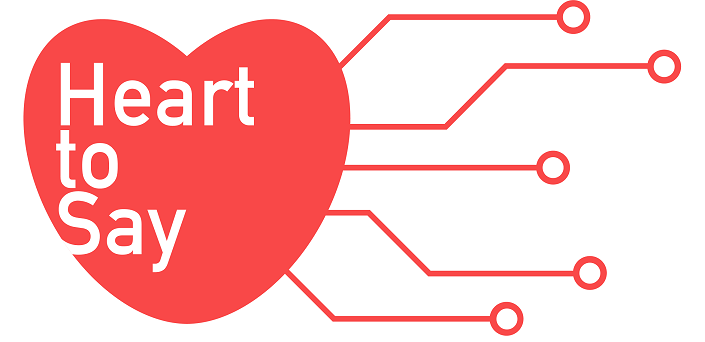

**Group A - Team members**

<ul>
    <li>Sahid Hasan Rahim</li>
    <li>Zhao Chen</li>
    <li>Ifani Pinto Nada</li>
    <li>Nan Jiang</li>
    <li>Mahmoud Elachi</li>
</ul>

# Model Building and SHAP

In part 2 of the jupyter notebook, we aim to discover the suitble classifiers to use to predict the DEATH_EVENT outcome.

## DATA PREPROCESSING

Let's start again with data preprocessing. This was done since there were error in saving and reloading the previous preprocessed file.

In [ ]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


In [ ]:
# Defining independent and dependent attributes in training and test sets
X = data.drop(["DEATH_EVENT"],axis=1)
y = data["DEATH_EVENT"]

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
# X_scaled.describe().T

Let's see the distribution again of the features:

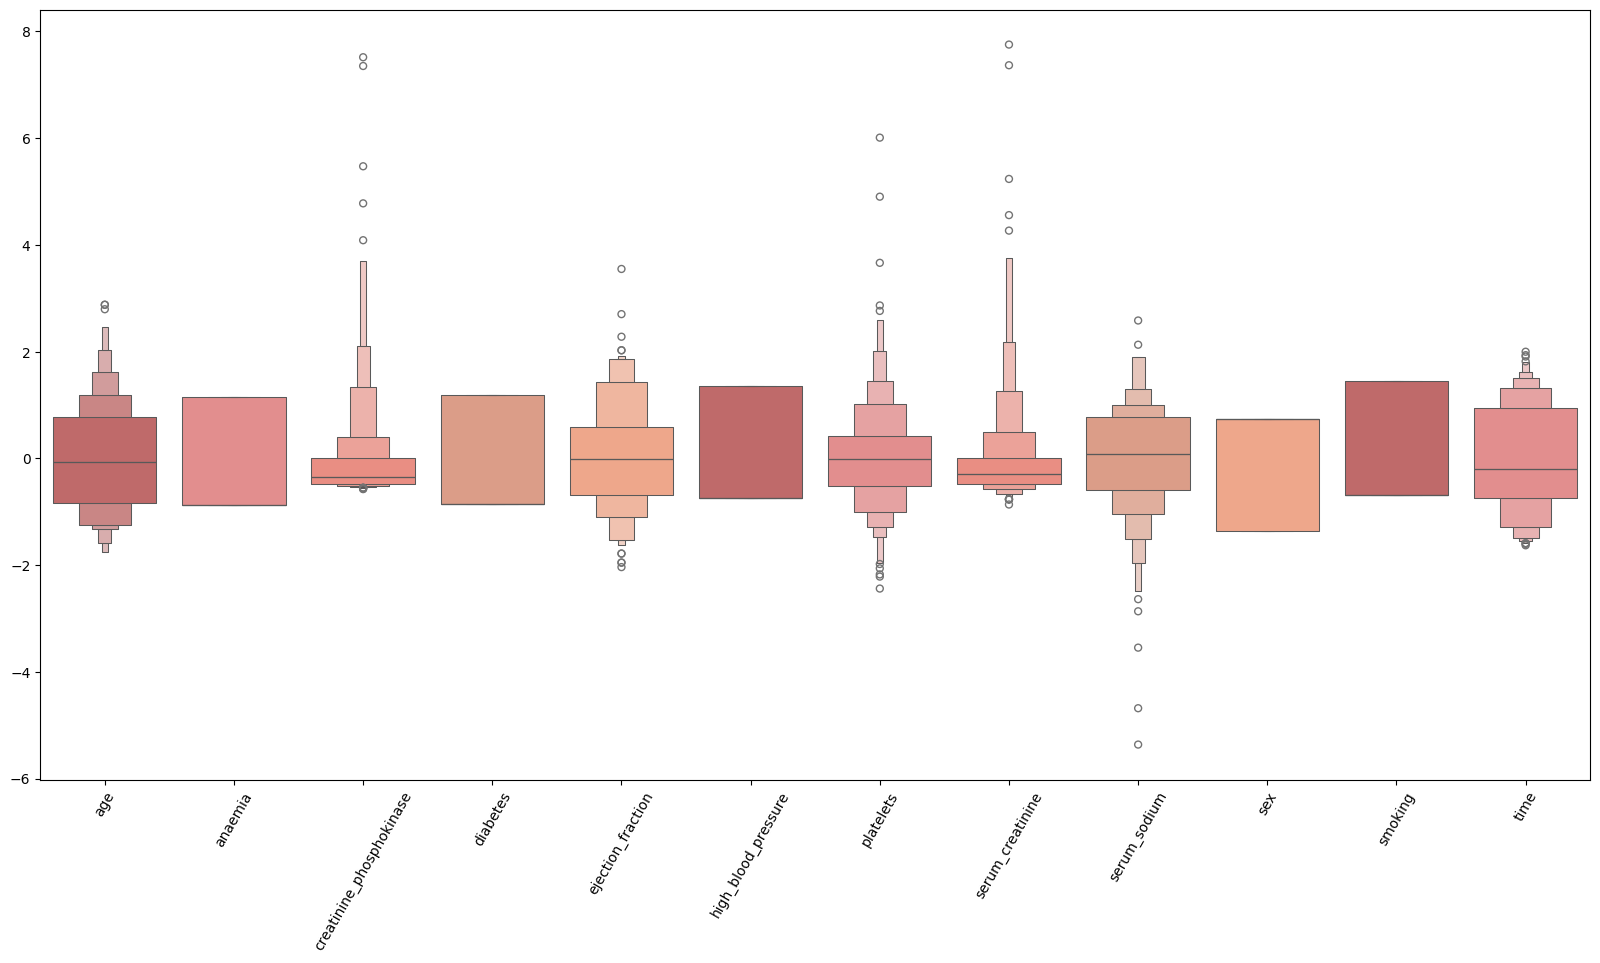

In [ ]:
#Plotting the scaled features using boxen plots
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [ ]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled, y,test_size=0.30,stratify=y ,random_state=25)

## MODEL BUILDING

A set of 10 different models was created, including Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and XGBoost, each set up with unique configurations. This allowed us to compare them and find the best-performing model. 

In [ ]:
# Create a dictionary with 10 classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

models = {
    "RF1": RandomForestClassifier(),
    "RF2": RandomForestClassifier(n_estimators=10),
    "RF3": RandomForestClassifier(n_estimators=10, max_depth=5),
    "KNN1": KNeighborsClassifier(n_neighbors=5),
    "KNN2": KNeighborsClassifier(n_neighbors=6),
    "SVM1": SVC(kernel='poly'),
    "SVM2": SVC(kernel='rbf'),
    "XGB1": xgb.XGBClassifier(),
    "XGB2": xgb.XGBClassifier(n_estimators=100,max_depth=6),
    "XGB3": xgb.XGBClassifier(n_estimators=100,max_depth=6,learning_rate=0.01)
}

# Iterate over the dictionary as follows:
for name, classifier in models.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)


The name of the classifier is: RF1  and it is a sklearn object: RandomForestClassifier()
The name of the classifier is: RF2  and it is a sklearn object: RandomForestClassifier(n_estimators=10)
The name of the classifier is: RF3  and it is a sklearn object: RandomForestClassifier(max_depth=5, n_estimators=10)
The name of the classifier is: KNN1  and it is a sklearn object: KNeighborsClassifier()
The name of the classifier is: KNN2  and it is a sklearn object: KNeighborsClassifier(n_neighbors=6)
The name of the classifier is: SVM1  and it is a sklearn object: SVC(kernel='poly')
The name of the classifier is: SVM2  and it is a sklearn object: SVC()
The name of the classifier is: XGB1  and it is a sklearn object: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
   

In [ ]:
# Create a pandas dataframe to store the results.
results = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1


In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply the classifier in each dataset
for name, classifier in models.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######

    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######

    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results = pd.concat([results, this_result], axis=0, ignore_index=True)

In [ ]:
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,RF1,0.16,0.01,0.81,0.73,0.66,0.69
1,RF2,0.02,0.00,0.81,0.71,0.69,0.70
2,RF3,0.02,0.00,0.82,0.81,0.59,0.68
3,KNN1,0.00,0.01,0.74,0.69,0.38,0.49
4,KNN2,0.00,0.01,0.71,0.80,0.14,0.24
5,SVM1,0.00,0.00,0.76,0.77,0.34,0.48
6,SVM2,0.00,0.00,0.78,0.68,0.59,0.63
7,XGB1,0.11,0.01,0.79,0.68,0.66,0.67
8,XGB2,0.04,0.01,0.79,0.68,0.66,0.67
9,XGB3,0.07,0.01,0.86,0.81,0.72,0.76


## Artificial Neural Network (ANN)

An Artificial Neural Network (ANN) model was built to see if it could match the accuracy of the other models in predicting the target. Each model was trained and tested multiple times, and the results were saved for further review.

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - binary_accuracy: 0.5211 - loss: 0.6914 - val_binary_accuracy: 0.6429 - val_loss: 0.6917
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.6527 - loss: 0.6727 - val_binary_accuracy: 0.6429 - val_loss: 0.6903
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.6858 - loss: 0.6627 - val_binary_accuracy: 0.6429 - val_loss: 0.6890
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7727 - loss: 0.6360 - val_binary_accuracy: 0.6429 - val_loss: 0.6876
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.7792 - loss: 0.6341 - val_binary_accuracy: 0.6429 - val_loss: 0.6860
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.7674 - loss: 0.6121 - val_binary_accuracy: 0.6429 - val_loss: 0.6841
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.7222 - loss: 0.6228 - val_binary_accuracy: 0.6429 - val_loss: 0.6821
Epoch 8/100
9/9 ━━━━━━━━━

<Axes: title={'center': 'Accuracy'}>

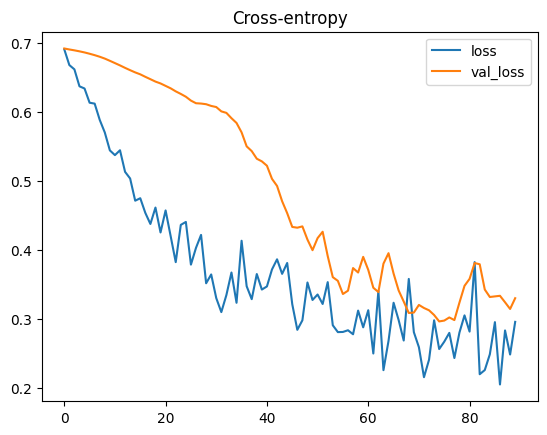

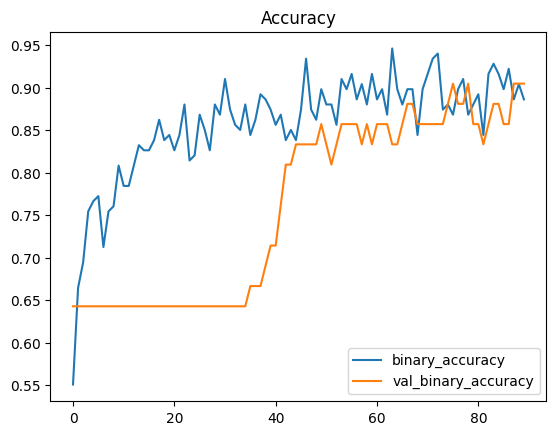

In [ ]:
# all dense layer
ann1 = keras.Sequential([
    layers.BatchNormalization(input_shape=[12]),
    layers.Dense(16, kernel_initializer = 'uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(8, kernel_initializer = 'uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.25),
    layers.Dense(8, kernel_initializer = 'uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Dense(1, kernel_initializer = 'uniform', activation='sigmoid'),
])

# Compiling the ANN
ann1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True
    )

# Train the ANN
history = ann1.fit(X_train, y_train, batch_size = 20, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
val_binary_accuracy = np.mean(history.history['val_binary_accuracy'])
print("\n%s: %.2f%%" % ('val_binary_accuracy is', val_binary_accuracy*100))


val_binary_accuracy is: 76.11%


In [ ]:
# Predicting the test set results
y_pred = ann1.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


Let's do a confusion matrix to evaluate the performance

<Axes: >

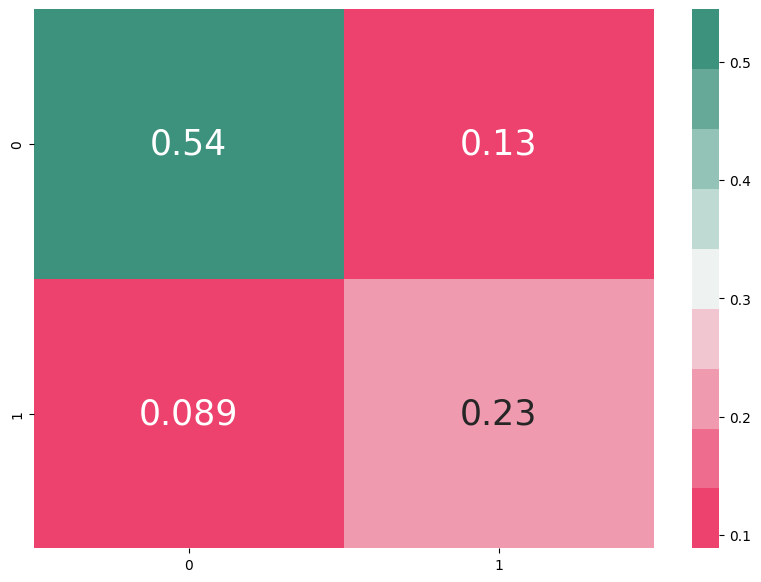

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        61
           1       0.64      0.72      0.68        29

    accuracy                           0.78        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.79      0.78      0.78        90



**Conlusion:** XGB3 model outperformed other models in crucial performance measures such as accuracy, recall, and F1-score. This indicates that had a balanced ability to correctly identify positive cases while minimizing false negatives.
Compared with ANN, the xgb3 model has an advantage in training and prediction time. ANN models usually take longer to train because they need to adjust a large number of parameters, especially as the number of network layers increases. Although ANN is more complex generally, it is not necessary to use ANN because the data set is relatively small. In addition, the performance of ANN in each training is unstable and cannot play a stable predictive role.

XGB3 is finally selected for web dashboard.

## **Prescriptive Analytics - Shapley Additive Explanations (SHAP)**

### 1. Global Importance

Global Importance refers to understanding the overall impact and importance of features in the model across the entire dataset.

In [ ]:
import shap
model = models["XGB3"]

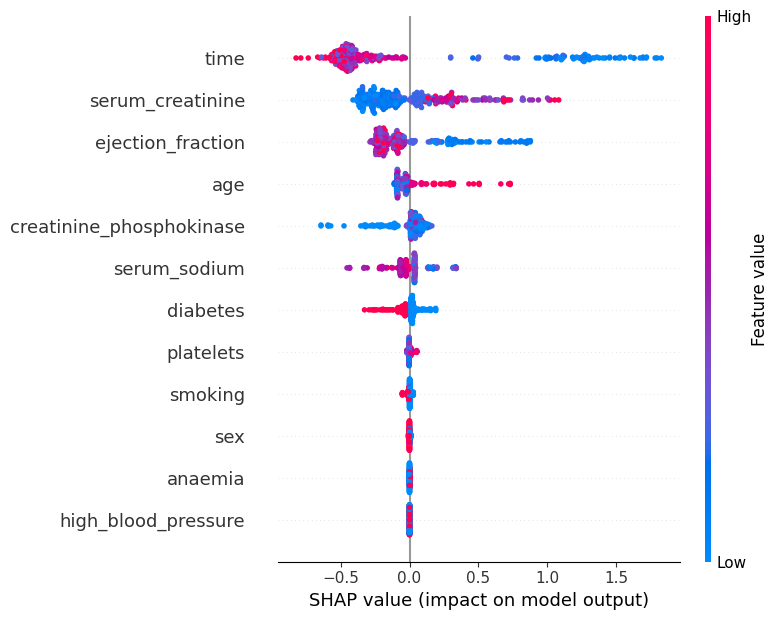

In [ ]:
# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_scaled)
# Calculate SHAP values for all instances
shap_values = explainer(X_scaled)
# Visualize global feature importance using summary plot
shap.summary_plot(shap_values, X_scaled)

Observation: Three important indication can be obtaned by analyzing the above SHAP chart. First, the features at the top have the most significant impact on predictions, while those at the bottom have less influence. Next, the position of each feature bar indicates the range of its impact on predictions. Lastly, each dot represents a data point, and the density around a region represents the contration of feature values.

We use the above results as examples, and the following findings can be derived.
- Feature Importance: Among the features analyzed, Time emerges as the most important feature, indicating that it has the most significant impact on predictions. Serum_creatinine follows as the second most important feature, while High_blood_pressure appears to have the least influence on predictions.
- Feature Effects: Features such as Time, Ejection_fraction, Serum_creatinine, Age exhibit a long tail to the right in the summary plot. This indicates that higher feature values for these variables have a greater impact on prediction. On the other hand, Creatinine_phosphokinase and Serum_sodium show a tail to the left, suggesting that higher values of these features negatively impact the predictions.
- Feature Value Density: Certain features, such as Time, Serum_creatinine, Ejection_fraction, Age, and Creatinine_phosphokinase, demonstrate a high density of data points within specific ranges of feature values. This suggests that there is a concentration of data points with feature values falling within those particular ranges.


### 2. Local Importance

Local Importance focuses on understanding the impact and contribution of features for individual predictions. It helps to explain why a specific prediction was made by highlighting the importance of different features for that particular instance.

The Local Importance of SHAP exhibits what features are crucial factors in prediction.


In [ ]:
# TreeExplaier for all tree-based algorithms, like XGBoost
explainer = shap.TreeExplainer(model)
# Output the shap values of individual instances in a array format
shap_values = explainer.shap_values(X_scaled)

In [ ]:
# Setup the dataframe for the Shap values
df_shap = pd.DataFrame(shap_values, columns=X_test.columns)
df_shap.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.02,-0.00,0.09,0.04,0.18,0.00,-0.00,0.21,0.13,-0.00,0.00,1.04
1,-0.02,-0.00,-0.01,0.01,-0.06,0.00,-0.00,-0.14,0.13,-0.00,0.00,1.69
2,-0.01,-0.00,0.06,0.02,0.26,0.00,-0.00,0.04,0.14,-0.00,-0.01,1.21
3,-0.01,0.00,0.09,0.04,0.17,0.00,-0.00,0.23,-0.23,-0.00,0.00,0.94
4,-0.01,0.00,0.07,-0.06,0.18,0.00,0.00,0.19,0.13,0.00,0.00,1.20


In [ ]:
# For illustration, use all samples for prediction
y_pred = model.predict(X_scaled)

df_pred = pd.DataFrame(y_pred, columns=['pred'])
df_pred.head(5)

,pred
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Check the shape of pred and shap dataframes
print('Pred size : {}, Shap size : {}'.format(df_pred.shape, df_shap.shape))

Pred size : (299, 1), Shap size : (299, 12)


In [ ]:
# merge the prediction and shap values
df_pred_shap = pd.concat([df_pred,df_shap], axis=1)

df_pred_shap.head(5)

,pred,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,0.02,-0.00,0.09,0.04,0.18,0.00,-0.00,0.21,0.13,-0.00,0.00,1.04
1,1,-0.02,-0.00,-0.01,0.01,-0.06,0.00,-0.00,-0.14,0.13,-0.00,0.00,1.69
2,1,-0.01,-0.00,0.06,0.02,0.26,0.00,-0.00,0.04,0.14,-0.00,-0.01,1.21
3,1,-0.01,0.00,0.09,0.04,0.17,0.00,-0.00,0.23,-0.23,-0.00,0.00,0.94
4,1,-0.01,0.00,0.07,-0.06,0.18,0.00,0.00,0.19,0.13,0.00,0.00,1.20


In [ ]:
# set the true and false prediction into two differnt dataframes
df_pred_shap_1 = df_pred_shap[df_pred_shap['pred'] == 1].reset_index()
df_pred_shap_0 = df_pred_shap[df_pred_shap['pred'] == 0].reset_index()

print('True : {}, False :{}'.format(df_pred_shap_1.shape, df_pred_shap_0.shape))

True : (84, 14), False :(215, 14)


In [ ]:
import random
# randomly select an index from a dataframe
def random_index_selection(dataframe):
    index_list = dataframe.index.tolist()
    random_index = random.choice(index_list)
    return random_index

#### 2.1 Local Importance for Positive Case

In [ ]:
# randomly select 4 rows
idx = [None] * 4

for i in range(4):
    idx[i] = random_index_selection(df_pred_shap_1)

print(idx)

[21, 71, 66, 83]


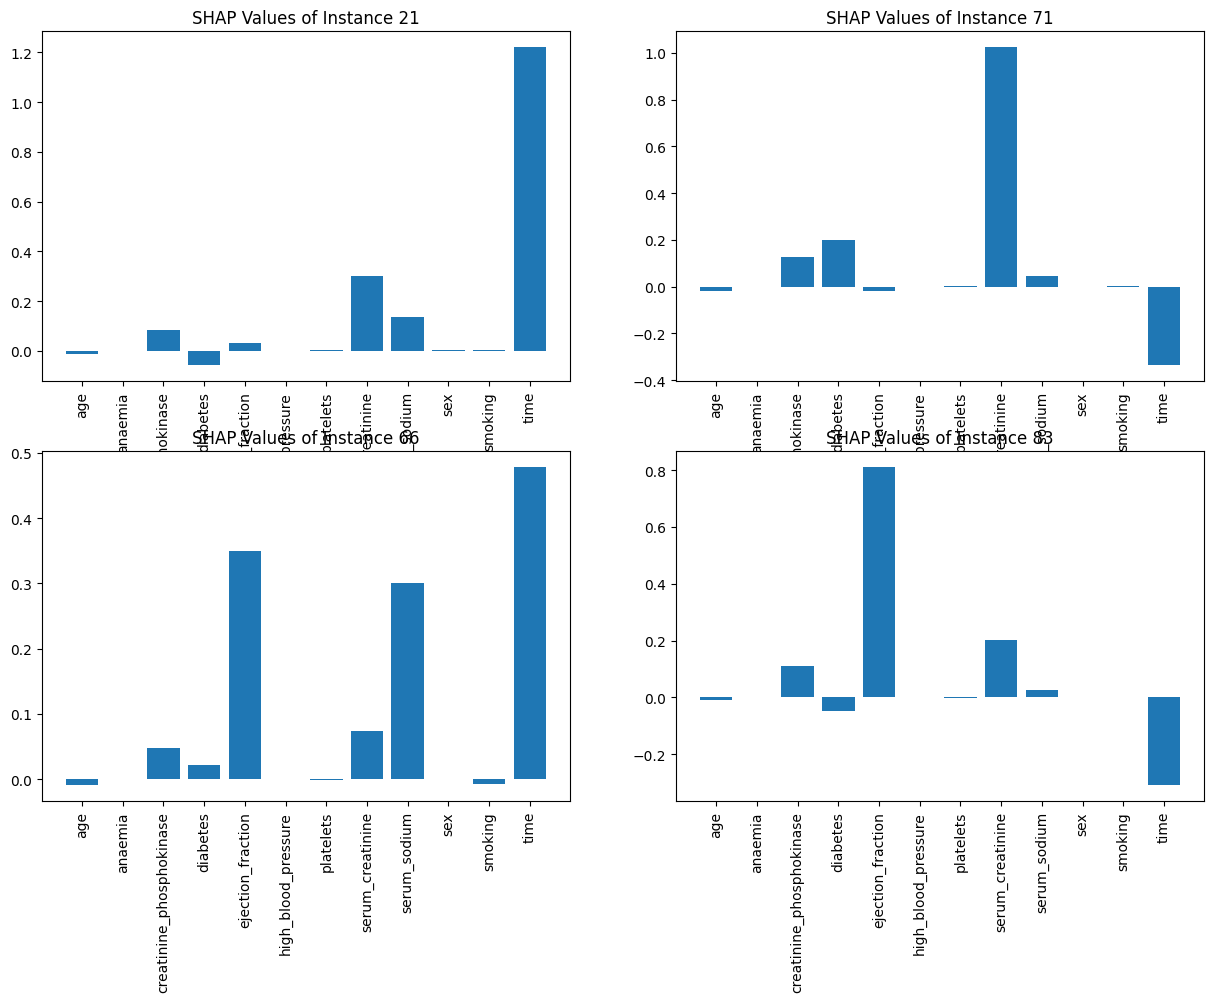

In [ ]:
# Manually select some instances with high variance
# idx =[67, 52, 79, 42]

# Select the row corresponding to instance 0
instances = df_pred_shap_1.drop(['pred','index'], axis=1)

# Create a bar chart of the feature values
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Create a bar chart in the first subplot
ax[0, 0].bar(instances.iloc[idx[0],:].index.tolist(), instances.iloc[idx[0],:].values.tolist())
ax[0, 1].bar(instances.iloc[idx[1],:].index.tolist(), instances.iloc[idx[1],:].values.tolist())
ax[1, 0].bar(instances.iloc[idx[2],:].index.tolist(), instances.iloc[idx[2],:].values.tolist())
ax[1, 1].bar(instances.iloc[idx[3],:].index.tolist(), instances.iloc[idx[3],:].values.tolist())

# ax.bar(instance.index, instance.values, ax[0][0])

# # Set labels and title
# ax.set_xlabel('Feature')
# ax.set_ylabel('Value')

# Set title for the first subplot
ax[0, 0].set_title('SHAP Values of Instance ' + str(idx[0]))
ax[0, 1].set_title('SHAP Values of Instance ' + str(idx[1]))
ax[1, 0].set_title('SHAP Values of Instance ' + str(idx[2]))
ax[1, 1].set_title('SHAP Values of Instance ' + str(idx[3]))

# Rotate x-axis labels if needed
ax[0, 0].tick_params(axis='x', rotation=90)
ax[0, 1].tick_params(axis='x', rotation=90)
ax[1, 0].tick_params(axis='x', rotation=90)
ax[1, 1].tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

**Observation:** Based on the Global Importance of SHAP, *Time, Serum_creatinine, and Ejection_fraction* are identified as the top three features with the most significant impact on predictions. However, it is important to note that while the significance of these top features in the Global Importance holds true for most cases, there are variations observed in individual instances, as indicated by the Local Importance analysis.

For example, in instances 71 and 83, Time has a negative impact on the prediction, which deviates from the overall importance assigned to it in the Global Importance analysis. In instance 21, Time emerges as the sole predictor, while other features have minimal significance in determining the prediction outcome. Instance 66 also exhibit distinct distributions in the local importance assigned by SHAP, further emphasizing the variation in feature significance at the individual level.

In summary, Global Importance is essential for explaining which features are significant in terms of overall predictive power. However, when it comes to explaining the prediction outcome of individual instances, Local Importance assumes an even more crucial role in providing insights into the decision-making process.

#### 2.2 Local Importance for Negative Case

In [ ]:
# randomly select 4 rows
idx = [None] * 4

for i in range(4):
    idx[i] = random_index_selection(df_pred_shap_0)

print(idx)

[14, 163, 128, 26]


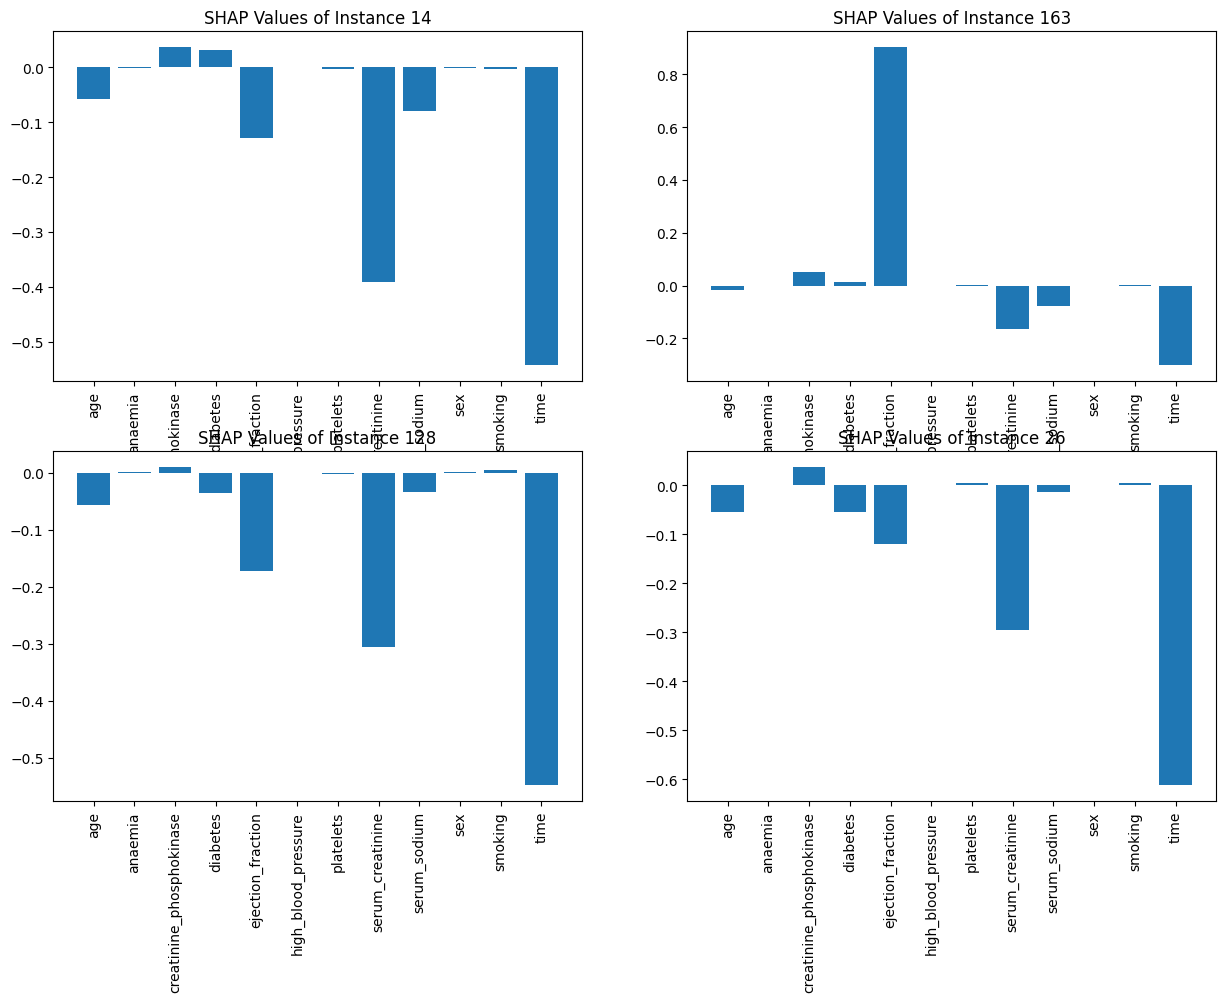

In [ ]:
# Manually select some instances with high variance for illustration purpose
# idx =[6, 41, 133, 136]


# Select the row corresponding to instance 0
instances = df_pred_shap_0.drop(['pred','index'], axis=1)

# Create a bar chart of the feature values
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Create a bar chart in the first subplot

ax[0, 0].bar(instances.iloc[idx[0],:].index.tolist(), instances.iloc[idx[0],:].values.tolist())
ax[0, 1].bar(instances.iloc[idx[1],:].index.tolist(), instances.iloc[idx[1],:].values.tolist())
ax[1, 0].bar(instances.iloc[idx[2],:].index.tolist(), instances.iloc[idx[2],:].values.tolist())
ax[1, 1].bar(instances.iloc[idx[3],:].index.tolist(), instances.iloc[idx[3],:].values.tolist())

# ax.bar(instance.index, instance.values, ax[0][0])

# # Set labels and title
# ax.set_xlabel('Feature')
# ax.set_ylabel('Value')

# Set title for the first subplot
ax[0, 0].set_title('SHAP Values of Instance ' + str(idx[0]))
ax[0, 1].set_title('SHAP Values of Instance ' + str(idx[1]))
ax[1, 0].set_title('SHAP Values of Instance ' + str(idx[2]))
ax[1, 1].set_title('SHAP Values of Instance ' + str(idx[3]))

# Rotate x-axis labels if needed
ax[0, 0].tick_params(axis='x', rotation=90)
ax[0, 1].tick_params(axis='x', rotation=90)
ax[1, 0].tick_params(axis='x', rotation=90)
ax[1, 1].tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

**Observation:**
In instances 14, 128 and 26, the Local Importance analysis aligns with the Global Importance, indicating consistent feature significance in determining the predictions. However, instance 163 stands out with a notable Local Importance pattern, indicating that the Ejection_fraction feature has a significant positive impact on the prediction outcome for this particular case.

These diverse observations highlight the value of examining Local Importance to gain insights into individual cases, where specific features may deviate from the overall trends established by Global Importance analysis.

## Final thoughts

**Final Thought:**  
This analysis underscores the importance of model selection and interpretability, especially in clinical contexts where understanding prediction rationale is crucial alongside prediction model performance. The dataset’s limited size of 299 instances presents challenges such as overfitting and limited generalizability, potentially impacting the reliability of predictions on broader populations. To address this, we explored various classifiers, using SHAP values to interpret feature contributions to the DEATH_EVENT outcome.

Interestingly, SHAP values highlighted "follow-up time" as an influential feature, indicating that patients' duration for a follow-up impacts the model’s predictions significantly. While follow-up time can be associated with death outcomes, its influence here may reflect the duration patients were monitored rather than specific health risk factors, potentially skewing results toward outcomes dependent on observation time rather than inherent patient characteristics. This highlights a limitation in interpretability, as follow-up time may confound the relationship between other clinical markers and mortality risk.

Overall, despite dataset and feature limitations, this study illustrates that even small datasets can yield valuable insights when paired with careful model selection and interpretability tools. Future analyses with larger datasets and a reduced focus on time-dependent variables could enhance model robustness and support more objective, clinically interpretable predictions to aid practitioners in informed, data-driven decision-making.